In [127]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from main import *

In [128]:
BASE_DIR = './tmp/data'
TRAIN_DIR = os.path.join(BASE_DIR, 'train.csv')
TEST_DIR = os.path.join(BASE_DIR, 'test.csv')

In [212]:
def wrangle(path):
    df = pd.read_csv(path).set_index("PassengerId")



    # df["Sex"] = (df["Sex"] == "male").astype(int)

    # Drop high cardinality categorical features
    high_cardinality = ["Name", "Ticket"]    
    df.drop(columns=high_cardinality, inplace=True)

    # Create total family size
    df["Tot_family"] = df["Parch"] + df["SibSp"] + 1
    # Drop Parch and SibSp
    df.drop(columns=["Parch", "SibSp"])


    return df

In [190]:
titanic = TitanicSurvival()
df = titanic.wrangle(TRAIN_DIR)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [132]:
# shape
df.shape

(891, 11)

In [133]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [134]:
# Fill NaN values
df["Age"].fillna(df["Age"].median(), inplace=True)

In [135]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
# fill NaN values with mostly repeated value
df["Embarked"].fillna("S", inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [138]:
# Check high and low-cardinality categorical features
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [139]:
# Drop high-cardinality categorical features
df.drop(columns=["Name", "Ticket"], inplace=True)

In [140]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,28.0,1,2,23.4500,NaN,S


#### Survived

In [141]:
survive = df["Survived"].value_counts(normalize=True)
survive

0    0.616162
1    0.383838
Name: Survived, dtype: float64

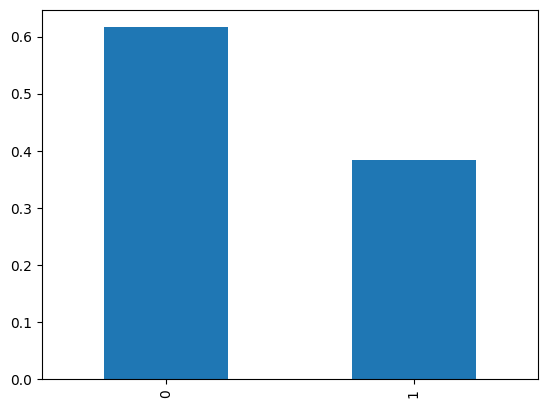

In [142]:
survive.plot(kind="bar");

It shows:
- Survived - 38.4%
-  Died - 61.6%

#### Multicollinerity

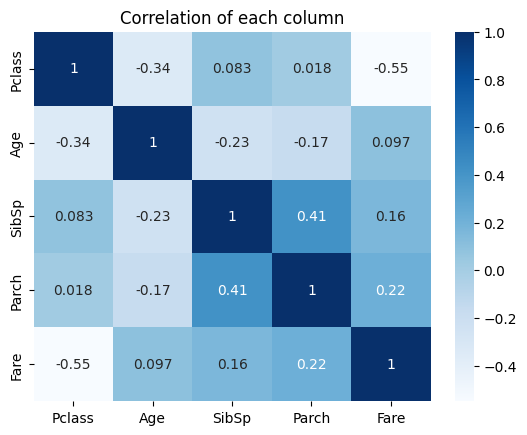

In [143]:
correlation = df.drop(columns="Survived").corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation of each column");

#### Pclass

In [144]:
pclass = pd.pivot_table(df, index="Pclass", values="Survived", aggfunc=np.mean)
pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


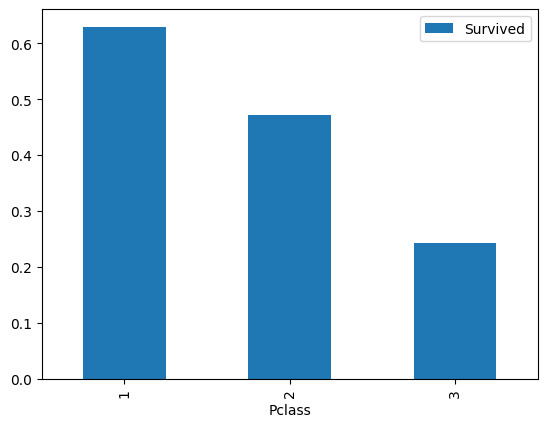

In [145]:
pclass.plot(kind="bar");

Most of them survived from 1st/Upper Class. So PClass has contribution of survival rate.

#### Sex

In [146]:
sex = pd.pivot_table(df, index="Sex", values="Survived", aggfunc=np.mean)
sex

,Survived
Sex,
female,0.742038
male,0.188908


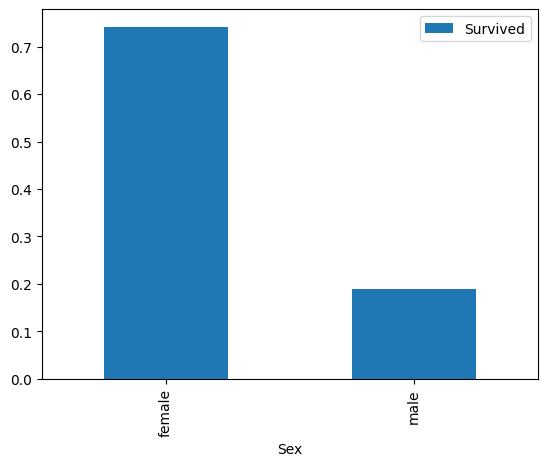

In [147]:
sex.plot(kind="bar");

#### Age

In [148]:
df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [149]:
df["Age"] = pd.cut(df["Age"], bins=5)
age = pd.pivot_table(df, index="Age", values="Survived", aggfunc="count")
age

,Survived
Age,
"(0.34, 16.336]",100
"(16.336, 32.252]",523
"(32.252, 48.168]",188
"(48.168, 64.084]",69
"(64.084, 80.0]",11


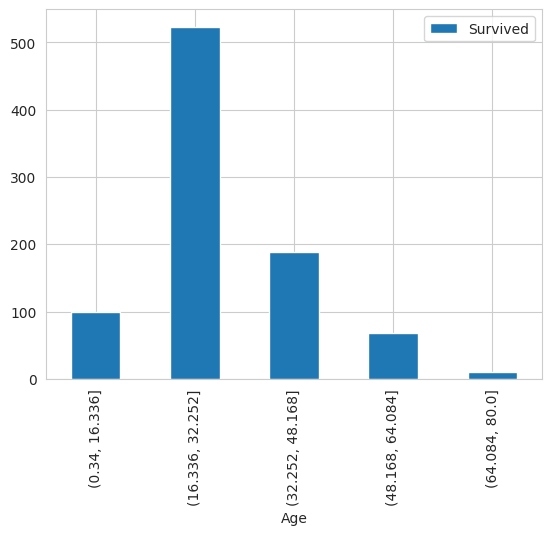

In [163]:
age.plot(kind="bar");

#### Family

In [198]:
df["Total Family"] = (df["Parch"] + df["SibSp"] + 1)
family = pd.pivot_table(df, index="Total Family", values="Survived", aggfunc=np.mean)
family

,Survived
Total Family,
1,0.300935
2,0.550000
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [219]:
df["Total Family"].value_counts(normalize=True)

1     0.602477
2     0.180180
3     0.114865
4     0.032658
6     0.024775
5     0.016892
7     0.013514
11    0.007883
8     0.006757
Name: Total Family, dtype: float64

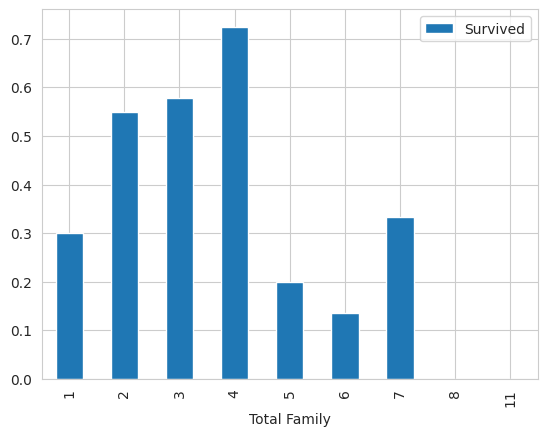

In [199]:
family.plot(kind="bar");

In [211]:
# Drop Parch and SibSp
df.drop(columns=["Parch", "SibSp"])

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Total Family,Fare_per_person
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,3.62
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,35.64
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,7.92
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,26.55
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,8.05
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,1,13.00
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,1,30.00
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,4,5.86


#### Fare

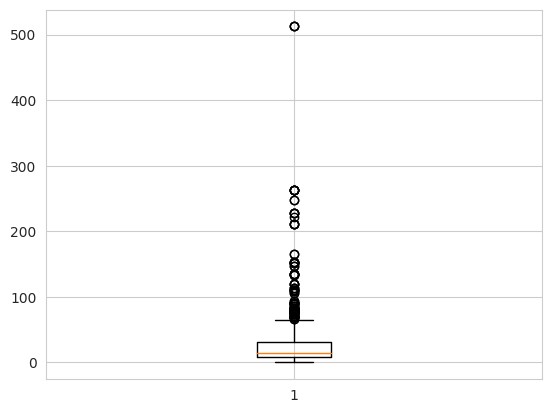

In [191]:
plt.boxplot(df["Fare"]);

In [213]:
# df["Fare_per_person"] = round(df["Fare"] / df["Total Family"], 2)

#### Embarked

In [214]:
embark = pd.pivot_table(df, index="Embarked", values="Survived", aggfunc=np.mean)
embark

,Survived
Embarked,
C,0.545455
Q,0.389610
S,0.336957


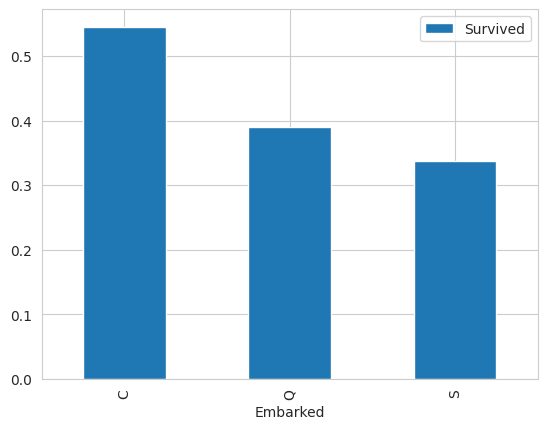

In [216]:
embark.plot(kind="bar");

In [ ]:
def visualization(df, index, value):
    result = pd.pivot_table(df, index=index, values=value, aggfunc=np.mean).sort_values(by=value, ascending=False)

    return result

LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(item):
    encoder = LabelEncoder()

    df[item] = encoder.fit_transform(df[item])

    return df

One Hot Encoding

In [ ]:
# One Hot encoding vs Label encoding